In [1]:
import pandas as pd

influence_inf = pd.read_csv('Llama-2-7b-chat-hf/grammars_10_inf.csv')
influence_lissa = pd.read_csv('Llama-2-7b-chat-hf/grammars_10_lissa.csv')
gradient_match = pd.read_csv('Llama-2-7b-chat-hf/grammars_10_gmatch.csv')

In [2]:
from datasets import load_from_disk

train_dataset = load_from_disk("../datasets/grammars")['train']
validation_dataset = load_from_disk("../datasets/grammars")['test']

most_data_inf = influence_inf.apply(lambda x: (-x).argmax(), axis=1)
most_data_lissa = influence_lissa.apply(lambda x: (-x).argmax(), axis=1)
most_data_gmatch = gradient_match.apply(lambda x: (-x).argmax(), axis=1)

def check_example(val_id, target):
    print(f'Validation Sample ID: {val_id}\n', 
          validation_dataset[val_id][target], '\n')
    print(f'The most influential training sample: {int(most_data_inf.iloc[val_id])}\n', 
          train_dataset[int(most_data_inf.iloc[val_id])][target], '\n')
    print('=' * 100)
    print(f'The most influential training sample: {int(most_data_lissa.iloc[val_id])}\n', 
          train_dataset[int(most_data_lissa.iloc[val_id])][target], '\n')
    print('=' * 100)
    print(f'The most influential training sample: {int(most_data_gmatch.iloc[val_id])}\n', 
          train_dataset[int(most_data_gmatch.iloc[val_id])][target], '\n')

In [3]:
check_example(0, 'prompts')

Validation Sample ID: 0
 Determine the grammar rules: Feathers float on dreams. -> dreams. on float Feathers 

The most influential training sample: 6
 Determine the grammar rules: Dreams wander lost valleys. -> valleys. lost wander Dreams 

The most influential training sample: 6
 Determine the grammar rules: Dreams wander lost valleys. -> valleys. lost wander Dreams 

The most influential training sample: 172
 Determine the grammar rules: Laughter heals deepest pains. -> lAuGhTeR HeAlS DeEpEsT PaInS. 



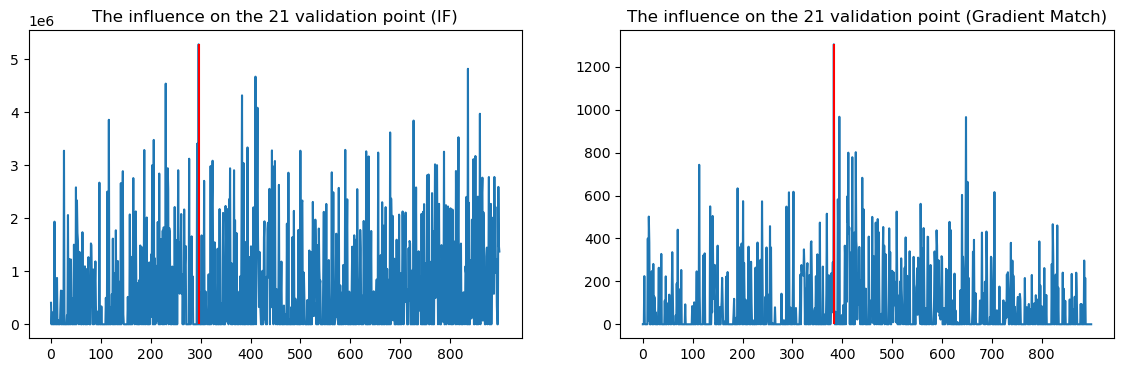

In [4]:
import numpy as np
from matplotlib import pyplot as plt

val_id = 21
step = 100
vali_if = influence_inf.loc[val_id].apply(lambda x: max(-x, 0))
vali_gmatch = gradient_match.loc[val_id].apply(lambda x: max(-x, 0))

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(vali_if)
plt.xticks(np.arange(0, len(train_dataset), 100))
plt.title('The influence on the ' + str(val_id) + ' validation point (IF)')
plt.vlines(most_data_inf[val_id], 0, vali_if.max(), 'r')

plt.subplot(1, 2, 2)
plt.plot(vali_gmatch)
plt.xticks(np.arange(0, len(train_dataset), 100))
plt.title('The influence on the ' + str(val_id) + ' validation point (Gradient Match)')
plt.vlines(most_data_gmatch[val_id], 0, vali_gmatch.max(), 'r')
plt.show()